In [37]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import fetch_mldata
import numpy as np
from sklearn.metrics import accuracy_score

In [38]:
mnist = fetch_mldata("MNIST original")

In [39]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [40]:
target = pd.DataFrame(mnist.target)

In [41]:
target

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [42]:
target['label'] = target[0]

In [43]:
data = pd.concat([target['label'], pd.DataFrame(mnist.data)], axis = 1)

In [19]:
.reset_index(drop = True)

In [44]:
data

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


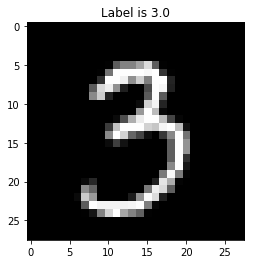

In [45]:
# The first column is the label
label = data.iloc[20000, 0]

# The rest of columns are pixels
pixels = data.iloc[20000, 1:]

# Make those columns into a array of 8-bits pixels
# This array will be of 1D with length 784
# The pixel intensity values are integers from 0 to 255
pixels = np.array(pixels, dtype='uint8')

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))

# Plot
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels, cmap='gray')
plt.show()

In [46]:
# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [15]:
SVC?

In [47]:
svm = SVC(C = 9, kernel = 'rbf', random_state = 100, verbose = True)

In [48]:
model = svm.fit(X_train, y_train)

[LibSVM]

In [49]:
predictions = model.predict(X_test)

In [50]:
accuracy_score(y_test, predictions)

0.9446

In [11]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98       980
        1.0       0.98      0.99      0.99      1135
        2.0       0.95      0.95      0.95      1032
        3.0       0.94      0.96      0.95      1010
        4.0       0.95      0.97      0.96       982
        5.0       0.96      0.93      0.95       892
        6.0       0.97      0.97      0.97       958
        7.0       0.97      0.95      0.96      1028
        8.0       0.95      0.94      0.95       974
        9.0       0.96      0.93      0.95      1009

avg / total       0.96      0.96      0.96     10000



In [12]:
confusion_matrix(y_test, predictions)

array([[ 970,    0,    1,    0,    0,    4,    1,    1,    3,    0],
       [   0, 1124,    3,    1,    0,    1,    3,    1,    2,    0],
       [   8,    1,  984,    7,    4,    0,    7,    8,   12,    1],
       [   0,    0,   10,  973,    0,    6,    0,    9,    9,    3],
       [   1,    1,    8,    0,  948,    0,    3,    1,    2,   18],
       [   6,    2,    2,   22,    3,  834,    8,    1,   11,    3],
       [   7,    2,    2,    0,    3,   12,  930,    0,    2,    0],
       [   2,    7,   20,    4,    7,    0,    0,  975,    1,   12],
       [   3,    3,    6,   16,    5,   11,    5,    4,  920,    1],
       [   5,    7,    1,   11,   25,    3,    1,   10,    3,  943]])